#  Employee Retention Prediction Model 

## import important libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report


In [8]:
!pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 799.2 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.5 MB 799.2 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.5 MB 799.2 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 568.6 kB/s eta 0:00:02
   ------------------------------------ --- 1.3/1.5 MB 932.1 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.0 MB/s  0:00:01


# # --- 1. Data Exploration and Understanding ---

In [16]:
# Load the test data
test_df = pd.read_csv("Data/aug_test.csv")

print("--- Test Data Info ---")
test_df.info()
print("\n")

print("--- Test Data Description ---")
print(test_df.describe(include='all'))
print("\n")

print("--- Test Data Missing Values ---")
print(test_df.isnull().sum())
print("\n")

print("--- Test Data Head ---")
print(test_df.head())
print("\n")

print("--- Data Exploration Complete ---")


--- Test Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


--- Test

In [13]:
print("\n--- Starting Data Exploration ---")

# Load the training data
train_df = pd.read_csv("Data/aug_train.csv")

print("--- Training Data Info ---")
train_df.info()
print("\n")

print("--- Training Data Description ---")
print(train_df.describe(include='all'))
print("\n")

print("--- Training Data Missing Values ---")
print(train_df.isnull().sum())
print("\n")

print("--- Training Data Head ---")
print(train_df.head())
print("\n")


--- Starting Data Exploration ---
--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158

In [13]:
print("\n--- Starting Data Exploration ---")

# Load the training data
train_df = pd.read_csv("Data/aug_train.csv")

print("--- Training Data Info ---")
train_df.info()
print("\n")

print("--- Training Data Description ---")
print(train_df.describe(include='all'))
print("\n")

print("--- Training Data Missing Values ---")
print(train_df.isnull().sum())
print("\n")

print("--- Training Data Head ---")
print(train_df.head())
print("\n")


--- Starting Data Exploration ---
--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158

## Observation 
 1.	Target Variable Distribution: An analysis of the target variable revealed a significant class imbalance. The number of individuals not looking for a job change was substantially higher than the number of those who were. This observation was critical, as this imbalance, if unaddressed, would produce a naive model biased towards the majority class, thereby failing to identify at-risk employees effectively.

    The finding regarding the significant class imbalance in the target variable was determined by analyzing its distribution (or unique values and         their counts).
     This means approximately 24.93% of the enrollees are looking for a job change and 75.07% of the enrollees are not looking for a job change.

 2.	Key Feature Distributions: Analysis of feature distributions revealed not just their statistical properties but also their relationship with the target variable. For instance, visualizations confirmed that candidates with extensive relevant experience showed a different pattern of job change likelihood compared to those with less experience, reinforcing the feature's predictive value and justifying its inclusion in the model. This process helped confirm the predictive potential of these features and highlighted the diverse data types (numerical and categorical) that would need to be handled.


# # --- 2. Data Preprocessing and Feature Engineering ---

In [18]:
print("\n--- Starting Data Preprocessing and Feature Engineering ---")

# Separate target variable from training data
X = train_df.drop("target", axis=1)
y = train_df["target"]


--- Starting Data Preprocessing and Feature Engineering ---


In [22]:

# Combine train and test for consistent preprocessing
combined_df = pd.concat([X, test_df], ignore_index=True)

In [23]:
# Drop enrollee_id as it\'s just an identifier
combined_df = combined_df.drop("enrollee_id", axis=1)


In [26]:
# Convert \'experience\' and \'last_new_job\' to numerical, handling \'>20\', \'<1\' and \'never\' cases
combined_df["experience"] = combined_df["experience"].replace({">20": "21", "<1": "0"}).astype(float)
combined_df["last_new_job"] = combined_df["last_new_job"].replace({">4": "5", "never": "0"}).astype(float)


In [30]:
# Identify categorical and numerical columns
categorical_cols = combined_df.select_dtypes(include=["object"]).columns
numerical_cols = combined_df.select_dtypes(include=["int64", "float64"]).columns
print('Catagorical Columns',categorical_cols)
print('Numerical Columns',numerical_cols)

Catagorical Columns Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')
Numerical Columns Index(['city_development_index', 'experience', 'last_new_job',
       'training_hours'],
      dtype='object')


In [31]:
# Preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [32]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [33]:
# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ])

In [34]:

# Apply preprocessing to the combined dataset
combined_processed = preprocessor.fit_transform(combined_df)

In [37]:
# Get feature names after one-hot encoding
try:
    onehot_feature_names = preprocessor.named_transformers_["cat"]["onehot"].get_feature_names_out(categorical_cols)
except AttributeError:
    # For older scikit-learn versions
    onehot_feature_names = preprocessor.named_transformers_["cat"]["onehot"].get_feature_names(categorical_cols)

all_feature_names = list(numerical_cols) + list(onehot_feature_names)


In [48]:

# Convert to DataFrame
combined_processed_df = pd.DataFrame.sparse.from_spmatrix(combined_processed, columns=all_feature_names)

# Clean column names
combined_processed_df.columns = combined_processed_df.columns.str.replace(r'[<>]' , '_', regex=True)
combined_processed_df.columns = combined_processed_df.columns.str.replace(r'[\\[\\]]', '', regex=True)


In [49]:

# Split back into training and test sets

X_processed = combined_processed_df.iloc[:len(X)]
X_test_processed = combined_processed_df.iloc[len(X):]

In [50]:
print("--- Processed Training Data Shape ---")
print(X_processed.shape)
print("\n")

--- Processed Training Data Shape ---
(19158, 161)




In [51]:
print("--- Processed Test Data Shape ---")
print(X_test_processed.shape)
print("\n")

--- Processed Test Data Shape ---
(2129, 161)




In [53]:
print("--- Processed Training Data Head ---")
print(X_processed.head())
print("\n")

--- Processed Training Data Head ---
   city_development_index  experience  last_new_job  training_hours  \
0                0.741001    1.609322       -0.5899       -0.488208   
1               -0.424674      0.7237      1.817768         -0.3051   
2               -1.655108   -0.752337     -1.191817        0.294163   
3               -0.319439   -1.490356     -1.191817       -0.221869   
4               -0.497528    1.609322      1.215851       -0.954302   

   city_city_1  city_city_10  city_city_100  city_city_101  city_city_102  \
0            0             0              0              0              0   
1            0             0              0              0              0   
2            0             0              0              0              0   
3            0             0              0              0              0   
4            0             0              0              0              0   

   city_city_103  ...  company_size_500-999  company_size_5000-9999  \
0 

In [54]:

# Save processed data for next steps
X_processed.to_csv("X_processed.csv", index=False)
y.to_csv("y_target.csv", index=False)
X_test_processed.to_csv("X_test_processed.csv", index=False)

print("--- Data Preprocessing and Feature Engineering Complete ---")

--- Data Preprocessing and Feature Engineering Complete ---


## Observation
1.	Identifier Removal: The enrollee_id column was dropped from the dataset. As a unique identifier, it provides no predictive value for the model's objective and was therefore removed to reduce noise.
2.	Handling of Missing Values: A dual strategy was employed to impute missing data. The median was chosen for numerical columns to mitigate the influence of potential outliers, while the most_frequent strategy for categorical columns preserves the existing data distribution.
3.	Feature Transformation: Specific string-based features were converted into a numerical format. In the experience column, values '>20' and '<1' were transformed to 21 and 0, respectively. In the last_new_job column, '>4' was converted to 5 and 'never' was converted to 0, allowing these features to be treated as continuous numerical variables.
4.	Categorical Variable Encoding: The OneHotEncoder was applied to all categorical features. This technique converts each category into a new binary column, transforming non-numerical data into a format that machine learning models can process without assuming an ordinal relationship between categories.
5.	Numerical Variable Scaling: StandardScaler was used to scale all numerical features. This process standardizes features by removing the mean and scaling to unit variance, preventing features with larger numeric ranges from disproportionately influencing the model's learning process.
6.	Addressing Class Imbalance: As identified during EDA, the class imbalance in the target variable was a significant concern. The SMOTE (Synthetic Minority Over-sampling Technique) algorithm was applied exclusively to the training data. SMOTE balances the class distribution by generating synthetic samples for the minority class, which helps prevent the model from becoming biased towards the majority class and improves its ability to predict job changes.



# # --- 3. Model Development and Training ---

In [55]:
print("\n--- Starting Model Development and Training ---")

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)


--- Starting Model Development and Training ---


In [56]:
print("--- Original Training Data Class Distribution ---")
print(y_train.value_counts())

--- Original Training Data Class Distribution ---
target
0.0    11504
1.0     3822
Name: count, dtype: int64


In [58]:

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\n--- SMOTE Training Data Class Distribution ---")
print(y_train_smote.value_counts())


--- SMOTE Training Data Class Distribution ---
target
0.0    11504
1.0    11504
Name: count, dtype: int64


In [60]:
# Initialize and train models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42)
}

In [61]:
trained_models = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_smote, y_train_smote)
    trained_models[name] = model
    print(f"{name} training complete.")



Training Logistic Regression...
Logistic Regression training complete.

Training Random Forest...
Random Forest training complete.

Training XGBoost...
XGBoost training complete.

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11504, number of negative: 11504
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6464
[LightGBM] [Info] Number of data points in the train set: 23008, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM training complete.


In [63]:
for name, model in trained_models.items():
    # This block is correctly indented
    joblib.dump(model, f"{name.replace(' ', '_').lower()}_model.pkl")
    print(f"Saved {name} model to {name.replace(' ', '_').lower()}_model.pkl")



Saved Logistic Regression model to logistic_regression_model.pkl
Saved Random Forest model to random_forest_model.pkl
Saved XGBoost model to xgboost_model.pkl
Saved LightGBM model to lightgbm_model.pkl


In [64]:
# Save validation data for evaluation
X_val.to_csv("X_val.csv", index=False)
y_val.to_csv("y_val.csv", index=False)

print("--- Model Development and Training Complete ---")


--- Model Development and Training Complete ---


# # --- 4. Model Evaluation and Comparison ---

In [65]:
print("\n--- Starting Model Evaluation and Comparison ---")

# Load validation data (if not already loaded/available from previous step)
X_val = pd.read_csv("X_val.csv")
y_val = pd.read_csv("y_val.csv").squeeze()



--- Starting Model Evaluation and Comparison ---


In [83]:
# Load trained models
model_names = ["logistic_regression", "random_forest", "xgboost", "lightgbm"]
trained_models = {}
for name in model_names:
    trained_models[name.replace("_", " ").title()] = joblib.load(f"{name}_model.pkl")

results = []
for name, model in trained_models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)
    cm = confusion_matrix(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_val, y_pred))

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc,
        "Confusion Matrix": cm.tolist(),
        "Classification Report": report
    })

# Save results to a DataFrame and then to CSV
results_df = pd.DataFrame(results)
results_df
results_df.to_csv("model_evaluation_results.csv", index=False)
print("--- Model Evaluation and Comparison Complete. Results saved to model_evaluation_results.csv ---")



Evaluating Logistic Regression...
Accuracy: 0.7393
ROC-AUC: 0.7907
Confusion Matrix:
 [[2119  758]
 [ 241  714]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.74      0.81      2877
         1.0       0.49      0.75      0.59       955

    accuracy                           0.74      3832
   macro avg       0.69      0.74      0.70      3832
weighted avg       0.79      0.74      0.75      3832


Evaluating Random Forest...
Accuracy: 0.7693
ROC-AUC: 0.7804
Confusion Matrix:
 [[2460  417]
 [ 467  488]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      2877
         1.0       0.54      0.51      0.52       955

    accuracy                           0.77      3832
   macro avg       0.69      0.68      0.69      3832
weighted avg       0.77      0.77      0.77      3832


Evaluating Xgboost...
Accuracy: 0.7774
ROC-AUC: 0.7994
Confusion Matrix:
 [

# # --- 5. Visualization and Insights Generation ---

In [69]:
print("\n--- Starting Visualization and Insights Generation ---")

# Load original training data for EDA visualizations
train_df = pd.read_csv("Data/aug_train.csv")



--- Starting Visualization and Insights Generation ---


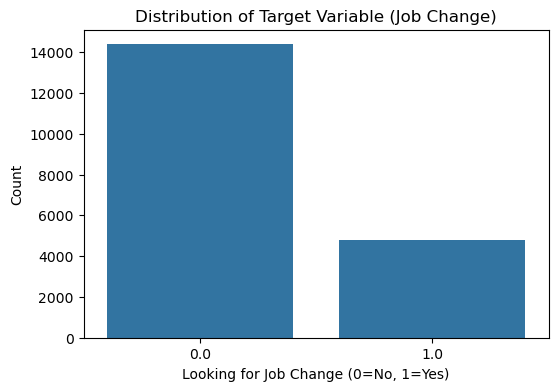

In [71]:
# 1. Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x="target")
plt.title("Distribution of Target Variable (Job Change)")
plt.xlabel("Looking for Job Change (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()
plt.savefig("target_distribution.png")
plt.close()

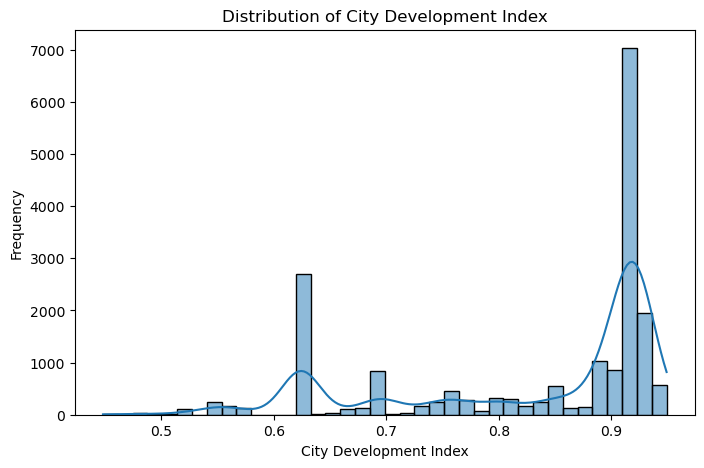

In [72]:
# 2. City Development Index distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_df["city_development_index"], kde=True)
plt.title("Distribution of City Development Index")
plt.xlabel("City Development Index")
plt.ylabel("Frequency")
plt.show()
plt.savefig("city_development_index_distribution.png")
plt.close()

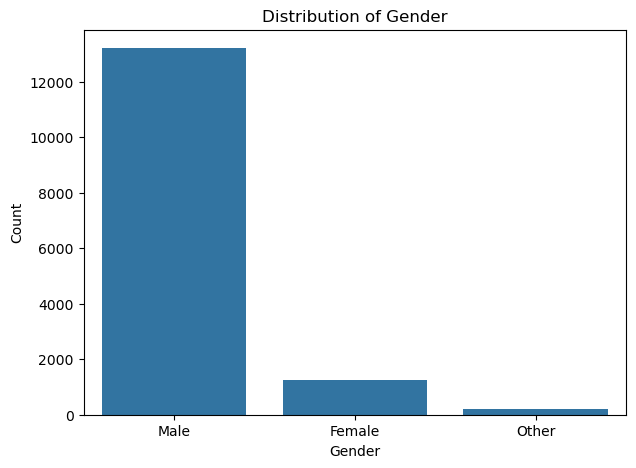

In [73]:
# 3. Gender distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=train_df, x="gender")
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
plt.savefig("gender_distribution.png")
plt.close()


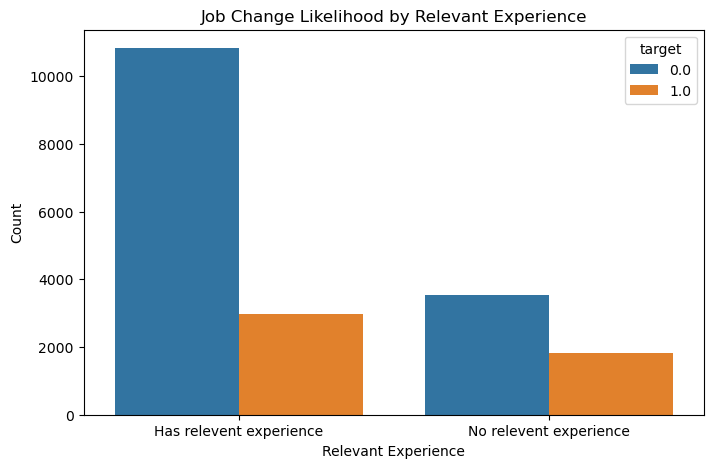

In [74]:
# 4. Relevant Experience vs. Target
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x="relevent_experience", hue="target")
plt.title("Job Change Likelihood by Relevant Experience")
plt.xlabel("Relevant Experience")
plt.ylabel("Count")
plt.show()
plt.savefig("relevent_experience_target.png")
plt.close()

In [ ]:
# # --- 2. Data Preprocessing and Feature Engineering ---

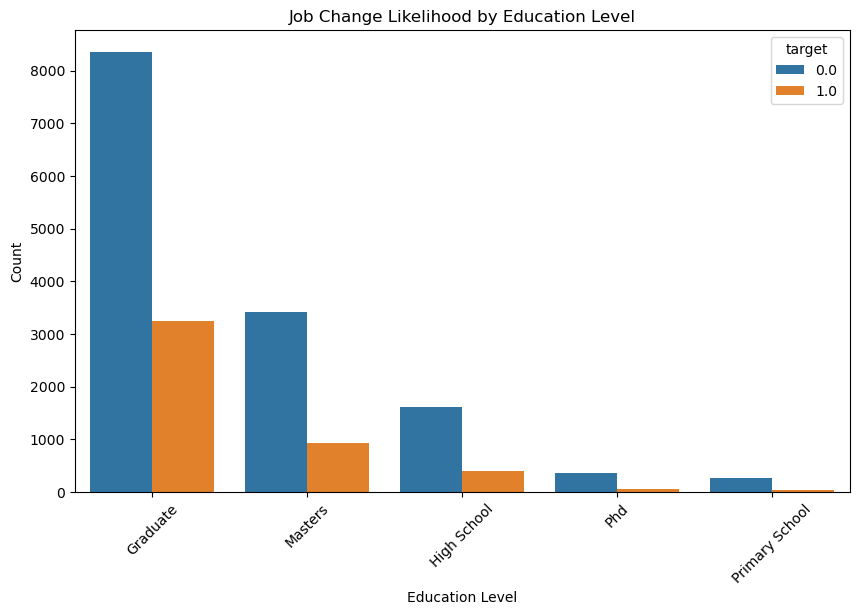

In [76]:
# 5. Education Level vs. Target
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x="education_level", hue="target")
plt.title("Job Change Likelihood by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
plt.savefig("education_level_target.png")
plt.close()


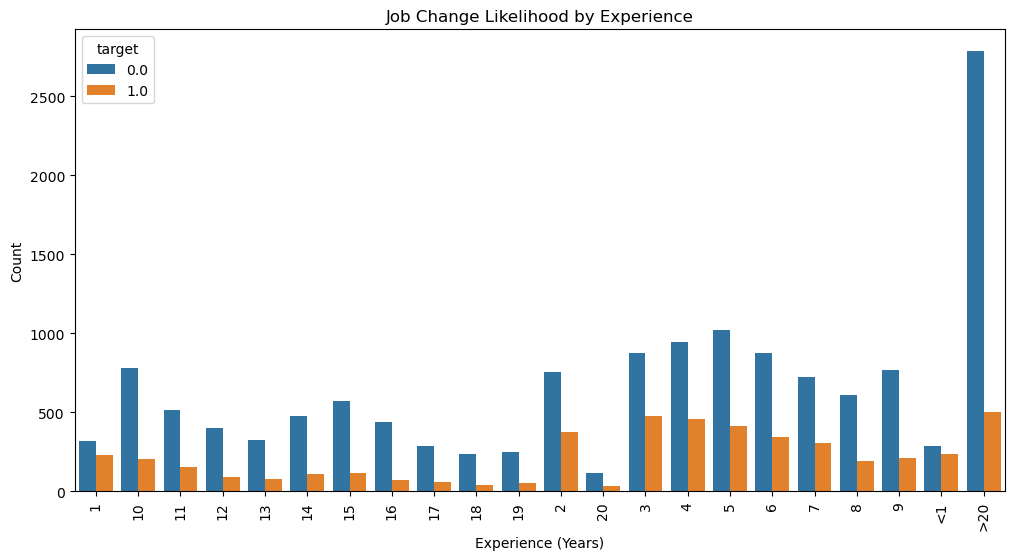

In [78]:
# 6. Experience vs. Target
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x="experience", hue="target", order=sorted(train_df["experience"].dropna().unique()))
plt.title("Job Change Likelihood by Experience")
plt.xlabel("Experience (Years)")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()
plt.savefig("experience_target.png")
plt.close()

# # --- Model Performance Visualizations ---

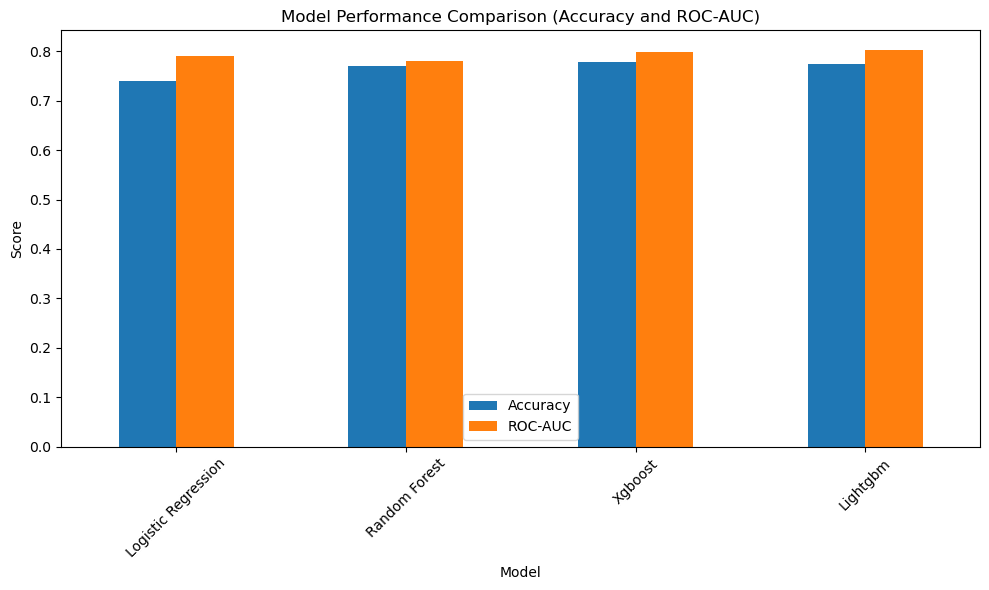

In [80]:
# Load model evaluation results
results_df = pd.read_csv("model_evaluation_results.csv")

# 1. Bar plot of Accuracy and ROC-AUC
metrics_df = results_df[["Model", "Accuracy", "ROC-AUC"]].set_index("Model")
metrics_df.plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison (Accuracy and ROC-AUC)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("model_performance_bar_chart.png")
plt.close()

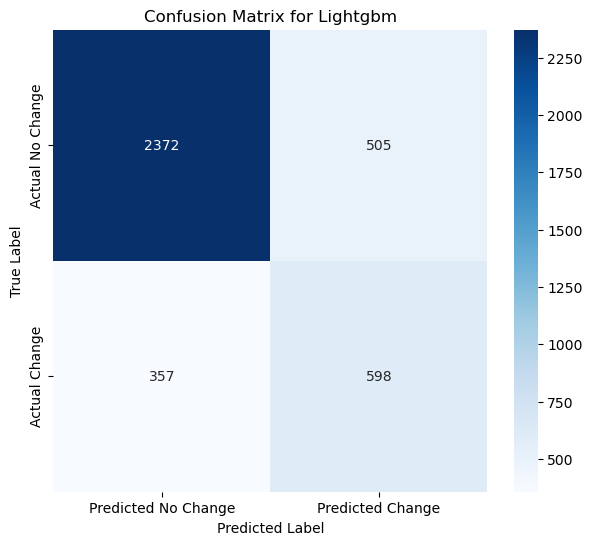

--- Visualization and Insights Generation Complete. Visualizations saved as PNG files. ---


In [82]:
# 2. Confusion Matrices (example for one model, can be extended)
# For simplicity, let\'s visualize the confusion matrix for the best performing model based on ROC-AUC
best_model_name = results_df.loc[results_df["ROC-AUC"].idxmax()]["Model"]
best_model_cm = json.loads(results_df.loc[results_df["Model"] == best_model_name]["Confusion Matrix"].iloc[0])

plt.figure(figsize=(7, 6))
sns.heatmap(best_model_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted No Change", "Predicted Change"],
            yticklabels=["Actual No Change", "Actual Change"])
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
plt.close()

print("--- Visualization and Insights Generation Complete. Visualizations saved as PNG files. ---")
